In [3]:
import torch 
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyperparameters
learning_rate=0.001
hidden_size=100
num_classes=10
num_epochs=5
batch_size=100
input_size=28*28



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

torch.Size([100, 1, 28, 28]) torch.Size([100])


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


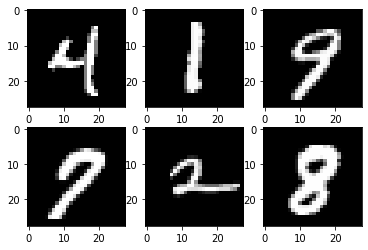

In [7]:
# loading the data
train_data=datasets.MNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)

test_data=datasets.MNIST(root='./data',train=False,transform=transforms.ToTensor(),download=True)
train_loader=DataLoader(train_data,batch_size=batch_size,shuffle=True)
test_loader=DataLoader(test_data,batch_size=batch_size,shuffle=False)

examples=iter(train_loader)
samples,labels=examples.next()

print(samples.shape,labels.shape)
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(samples[i][0],cmap='gray')
plt.show()



In [13]:
# creating simple cnn
class NN(nn.Module):
  def __init__(self,input_size,hidden_size,num_classes):
    super(NN,self).__init__()
    self.fc1=nn.Linear(input_size,hidden_size)
    self.relu=nn.ReLU()
    self.fc2=nn.Linear(hidden_size,num_classes)

  def forward(self,x):
    out=self.fc1(x)
    out=self.relu(out)
    out=self.fc2(out)
    return out

model=NN(input_size,hidden_size,num_classes).to(device)

# loss and optimizer
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)


In [14]:
# training
n_total_steps=len(train_loader)
for epoch in range(num_epochs):
  for i, (images,labels) in enumerate(train_loader):
    images=images.reshape(-1,28*28).to(device)
    labels=labels.to(device)

    #forward pass
    outputs=model(images)
    loss=criterion(outputs,labels)

    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1)%100==0:
      print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps},loss={loss.item():.4f}')



epoch 1/5, step 100/600,loss=0.4043
epoch 1/5, step 200/600,loss=0.3546
epoch 1/5, step 300/600,loss=0.2124
epoch 1/5, step 400/600,loss=0.2774
epoch 1/5, step 500/600,loss=0.2050
epoch 1/5, step 600/600,loss=0.3756
epoch 2/5, step 100/600,loss=0.1619
epoch 2/5, step 200/600,loss=0.1879
epoch 2/5, step 300/600,loss=0.1403
epoch 2/5, step 400/600,loss=0.2939
epoch 2/5, step 500/600,loss=0.2247
epoch 2/5, step 600/600,loss=0.1064
epoch 3/5, step 100/600,loss=0.1302
epoch 3/5, step 200/600,loss=0.1281
epoch 3/5, step 300/600,loss=0.1244
epoch 3/5, step 400/600,loss=0.2547
epoch 3/5, step 500/600,loss=0.0740
epoch 3/5, step 600/600,loss=0.0721
epoch 4/5, step 100/600,loss=0.0919
epoch 4/5, step 200/600,loss=0.1175
epoch 4/5, step 300/600,loss=0.1445
epoch 4/5, step 400/600,loss=0.1253
epoch 4/5, step 500/600,loss=0.1051
epoch 4/5, step 600/600,loss=0.0348
epoch 5/5, step 100/600,loss=0.0700
epoch 5/5, step 200/600,loss=0.0811
epoch 5/5, step 300/600,loss=0.1042
epoch 5/5, step 400/600,loss

In [15]:
# test 
with torch.no_grad():
  n_correct=0
  n_samples=0
  for images,labels in test_loader:
    images=images.reshape(-1,28*28).to(device)
    labels=labels.to(device)
    outputs=model(images)
  # value,index
    _,predictions=torch.max(outputs,1)

    n_samples+=labels.shape[0]
    n_correct+=(predictions==labels).sum().item()
  acc=100.0 * n_correct / n_samples
  print(f'accuracy={acc}')



accuracy=97.04
